# Set up the script

In [79]:
%matplotlib notebook
%pylab 


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/Cellar/ipython/6.4.0/libexec/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['angle', 'resize', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [80]:
import skimage.io
from skimage import feature
from skimage import color
from skimage.transform import resize

# import the game map

In [81]:
erangel_gray = color.rgb2gray(imread('resources/erangelMapGrid.png'))

<IPython.core.display.Javascript object>


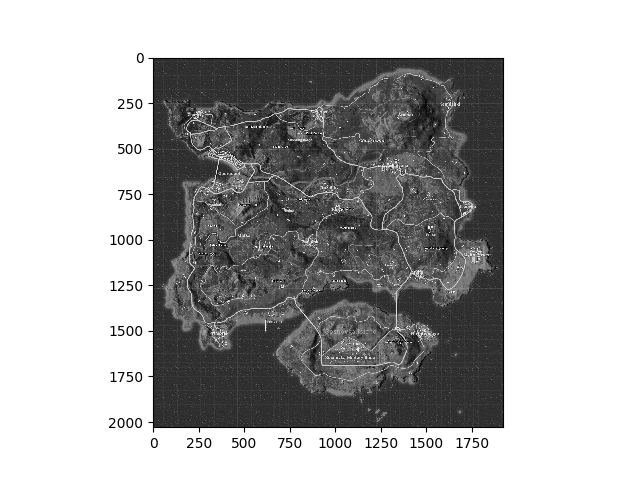

In [82]:
figure();
imshow(erangel_gray,cmap='gray')

# Import a few sample video frames

<IPython.core.display.Javascript object>


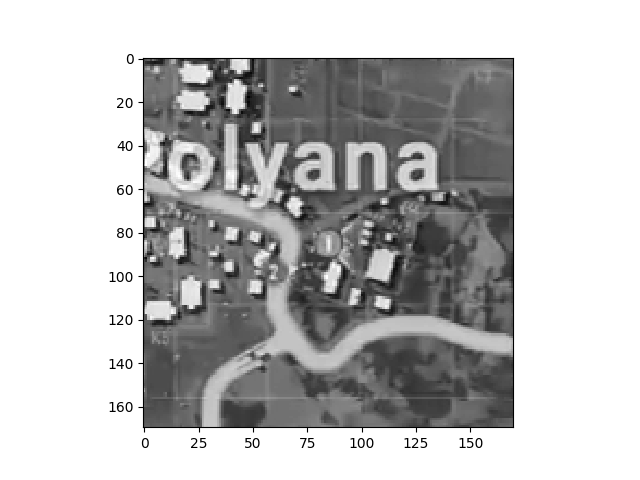

In [83]:
figure(); 
frame1full=imread('resources/frames/sampleGPV2/01088.png')
frame1 = color.rgb2gray(frame1full[530:-20,1085:-25])  ##for this particular video  TODO: make this more agnostic
imshow(frame1, cmap='gray')

# perform resize of minimap to scale to world map, and perform template matching.  TODO:  loop this over many frames

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<IPython.core.display.Javascript object>


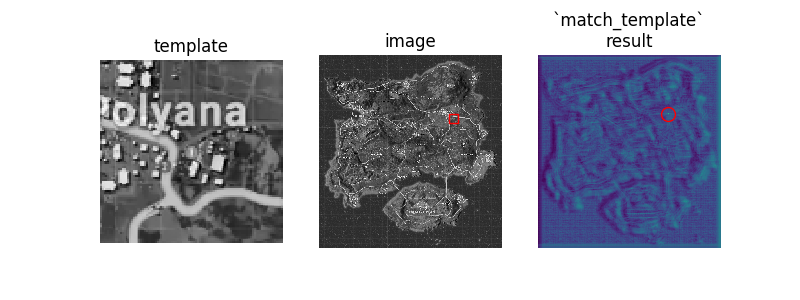

In [84]:
from skimage import data
from skimage.feature import match_template


image = erangel_gray
coin = resize(frame1, (int(frame1.shape[0] *25 / 42.5), int(frame1.shape[1] *25 / 42.5))) ## math is for this particular map/minimap combo
#coin = frame1

result = match_template(image, coin, pad_input=True)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

# This is the line we care about!

In [85]:
np.unravel_index(np.argmax(result),result.shape)

(617, 1369)